In [209]:
import os

# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [210]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [211]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [212]:
train_images = train_images / 255.0
test_images = test_images / 255.0

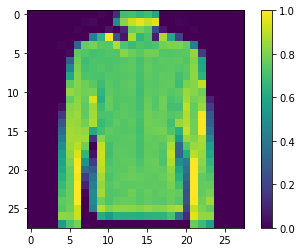

In [213]:
plt.figure()
plt.imshow(train_images[np.random.randint(train_images.shape[0])])
plt.colorbar()
plt.grid(False)
plt.show()

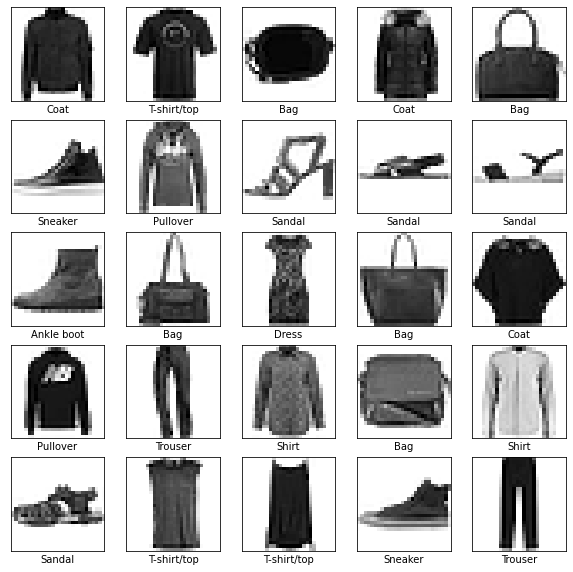

In [214]:
plt.figure(figsize=(10,10))
items=25
for i in range(items):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    item=np.random.randint(train_images.shape[0]-items)+i
    plt.imshow(train_images[item], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[item]])
plt.show()

In [216]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [217]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [218]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [225]:
epochs=20
history = model.fit(
    train_images, 
    train_labels, 
    epochs=epochs,
    validation_data=(test_images, test_labels),
#    callbacks=[cp_callback]
)

Epoch 1/20
1875/1875 [==============================] - 1s 741us/step - loss: 0.2314 - accuracy: 0.9140 - val_loss: 0.3409 - val_accuracy: 0.8847
Epoch 2/20
1875/1875 [==============================] - 1s 683us/step - loss: 0.2266 - accuracy: 0.9144 - val_loss: 0.3502 - val_accuracy: 0.8771
Epoch 3/20
1875/1875 [==============================] - 1s 692us/step - loss: 0.2171 - accuracy: 0.9184 - val_loss: 0.3429 - val_accuracy: 0.8858
Epoch 4/20
1875/1875 [==============================] - 1s 692us/step - loss: 0.2110 - accuracy: 0.9201 - val_loss: 0.3501 - val_accuracy: 0.8828
Epoch 5/20
1875/1875 [==============================] - 1s 685us/step - loss: 0.2057 - accuracy: 0.9222 - val_loss: 0.3449 - val_accuracy: 0.8870
Epoch 6/20
1875/1875 [==============================] - 1s 693us/step - loss: 0.1999 - accuracy: 0.9247 - val_loss: 0.3409 - val_accuracy: 0.8872
Epoch 7/20
1875/1875 [==============================] - 1s 697us/step - loss: 0.1956 - accuracy: 0.9267 - val_loss: 0.3467 -

In [226]:
loss, accuracy = model.evaluate(test_images,  test_labels, verbose=2)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

313/313 - 0s - loss: 0.4270 - accuracy: 0.8869
Loss:  0.4269862771034241
Accuracy:  0.886900007724762


In [227]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [228]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

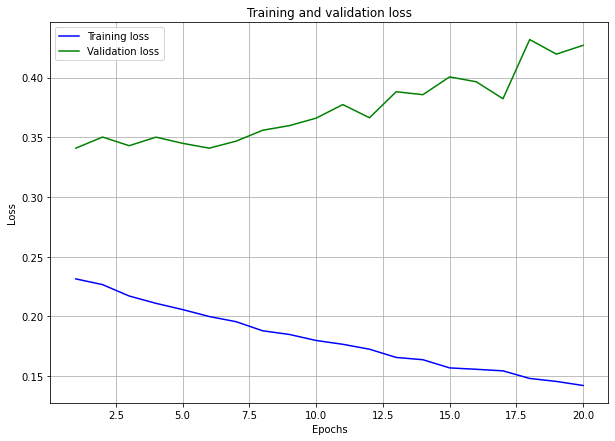

In [243]:
acc = history_dict['accuracy']
loss = history_dict['loss']

val_acc = history_dict['val_accuracy']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10,7))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

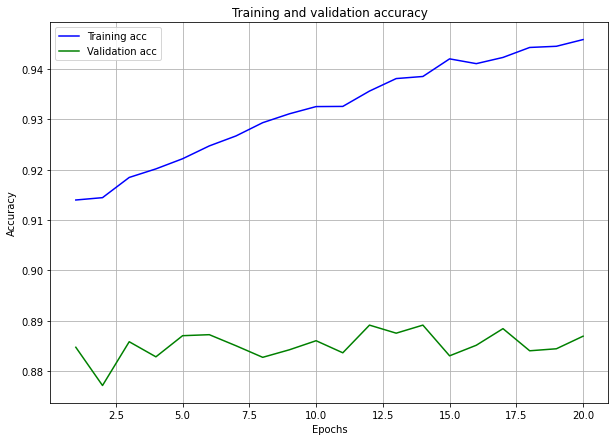

In [244]:
plt.figure(figsize=(10,7))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [198]:
predictions[0]

array([4.6594458e-08, 3.5349210e-09, 7.6513174e-08, 2.4093485e-08,
       7.6778284e-10, 1.0804622e-03, 2.2328919e-07, 1.0344974e-02,
       1.7811074e-06, 9.8857236e-01], dtype=float32)

In [199]:
np.argmax(predictions[0])

9

In [200]:
test_labels[0]

9

In [201]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


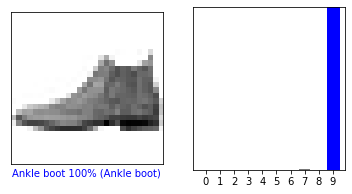

In [246]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

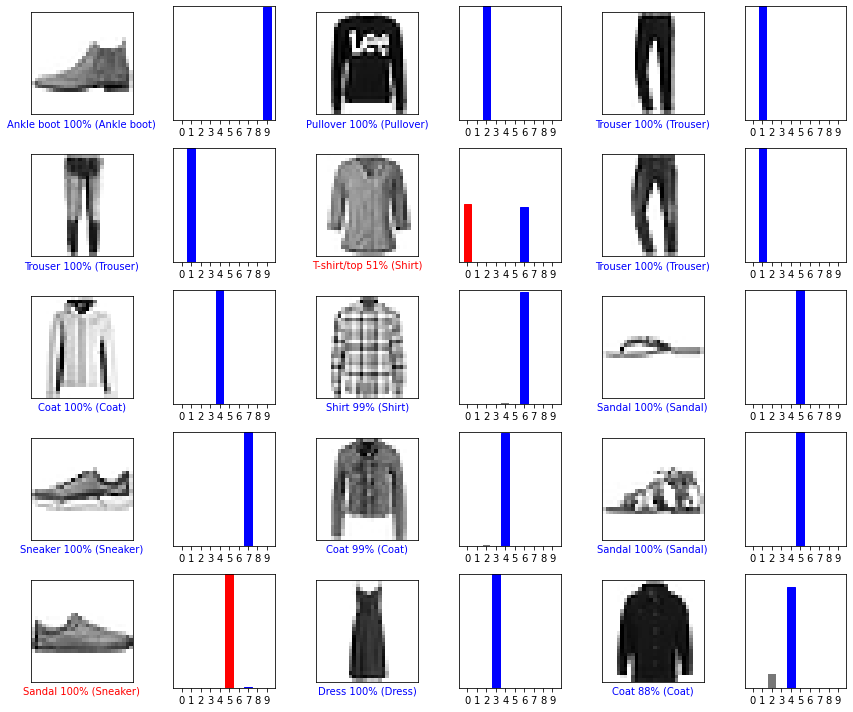

In [245]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [247]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [248]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [249]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.51314325e-05 7.75137634e-18 9.99974608e-01 3.16976140e-17
  9.61440037e-06 5.37891812e-18 6.16850571e-07 1.60797371e-19
  2.97385441e-14 6.90740221e-19]]


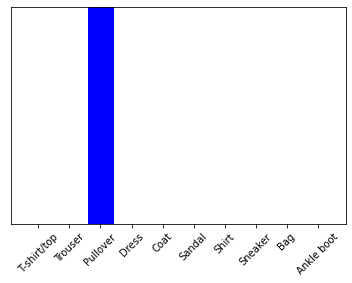

In [250]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [251]:
np.argmax(predictions_single[0])

2

In [260]:
model.save('saved_model')

INFO:tensorflow:Assets written to: saved_model/assets


In [261]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model') # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)